# Latent Probability Model

If you are running this for the first time you may need to use the following commands before continuing:

In [3]:
!pip install pandas==1.3.5
!pip install spacy==3.2.0
!pip install spacytextblob
!python -m spacy download en_core_web_sm

!pip install newspaper3k

!pip install plotly

!pip install bokeh

  Using cached pandas-1.3.5-cp310-cp310-win_amd64.whl (10.2 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.3.5 which is incompatible.


  Using cached typer-0.4.2-py3-none-any.whl (27 kB)
  Using cached pydantic-1.8.2-py3-none-any.whl (126 kB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.12
    Uninstalling pydantic-1.10.12:
      Successfully uninstalled pydantic-1.10.12
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chromadb 0.4.12 requires pydantic<2.0,>=1.9, but you have pydantic 1.8.2 which is incompatible.
chromadb 0.4.12 requires typer>=0.9.0, but you have typer 0.4.2 which is incompatible.


     ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
     --------------------------------------- 0.0/13.9 MB 991.0 kB/s eta 0:00:14
     ---------------------------------------- 0.1/13.9 MB 1.7 MB/s eta 0:00:09
     - -------------------------------------- 0.4/13.9 MB 2.9 MB/s eta 0:00:05
     - -------------------------------------- 0.7/13.9 MB 3.9 MB/s eta 0:00:04
     -- ------------------------------------- 1.0/13.9 MB 4.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.9/13.9 MB 7.3 MB/s eta 0:00:02
     ---------- ----------------------------- 3.6/13.9 MB 10.8 MB/s eta 0:00:01
     ---------------- ----------------------- 5.8/13.9 MB 15.4 MB/s eta 0:00:01
     ----------------------- ---------------- 8.0/13.9 MB 19.0 MB/s eta 0:00:01
     ---------------------------- ---------- 10.2/13.9 MB 21.8 MB/s eta 0:00:01
     ---------------------------------- ---- 12.4/13.9 MB 43.7 MB/s eta 0:00:01
     --------------------------------------  13.9/13.

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl#egg=en_core_web_sm==3.2.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617


Spacy: Used for NLP and has the machine learning module
    
SpacyTextBlob: Used for the sentiment analysis
    
Pandas: Stores the data as a dataframe table
    
NewsPaper: Used for web scraping
    
Requests: Makes the connection to the URL

In [96]:
from newspaper import Article
from random import shuffle
import re
import matplotlib.pyplot as plt 
from collections import Counter

import numpy as np
import json
import requests
import glob

#gensim
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary  # Import the Dictionary class from Gensim

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim
import plotly.express as px
import matplotlib.colors as mcolors


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [25]:
#import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pandas as pd
import requests
#from newspaper import Article
#import numpy as np

In [232]:
%run SentimentAnalysis.ipynb
%run WebScraper.ipynb
%run PipelineHelpers.ipynb
%run TopicModeling.ipynb
%run DataVisualization.ipynb

IMPORTANT: If you want to try re-runing after making some code changes or want to 
run a new .csv file through the code block below and the one a couple down with the
 rerun note will need to be ran again for the analysis to work correctly

In [213]:
# Loading our two pipelines
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

IMPORTANT: Insert the .csv file you want to be read below.

In [214]:
csvFile = "urls_gabriel_generated.csv"
wordCountFilter = 150
#social_starts_with = ["https://www.youtube.com", "https://youtu.be", "https://www.facebook.com", 
#                     "https://twitter.com", "https://gettr.com/"]


In [215]:
# rerun
# Using panda to load in our .csv file
df = pd.read_csv(csvFile) # File we are checking
urls = df["Address"].tolist() # Column name we are checking
all_text_gathered = []
all_articles = ''
scentence_list = []


# This is the pipeline. All code is called and ran through here.

In [216]:
# Loops through our URLS and scraps the data
# Put all empty dictionaries here
sentimentDic = {}
    
for count, x in enumerate(urls):
    if(count % 10 == 0):
        print(str(count))

    url = x

    # Send the URL to get scraped
    page_text = scrapeData(x)
    # All articles will have a long string of all the text that has been scraped
    all_articles = all_articles + " " +  page_text
    
    # Puts the article into a list of all the sentences in the article
    sentenceList = sentenceLevel(page_text)

    # Runs sentiment analysis. Will need to make a new function and a new dictionary
    # for each type of analysis we want to run. Will pass in the page_text, the dic, and
    # x (the url)
    sentimentDic = sentimentAnalysis(page_text, sentimentDic, url)
        
        
        
#print("The average sentiment score was: " + str(sum(url_sent_score) / len(url_sent_score)))
#print("The average subjectivity score was: " + str(sum(url_subj_score) / len(url_subj_score)))

# For each analysis we run we need to then convert that dictionary with the following method
df = dictionaryToDataFrame(sentimentDic)
df
# Used if we want to convert it to a .csv sentDic.to_csv("sentiment130.csv")


0
word count  39
repeated phrases 1
https://www.bbc.com/news/world-us-canada-55805698


,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words,Text
0,https://www.foxnews.com/politics/hunter-bidens...,0.04,Neutral,0.24,"more, unpaid, best, new, main, legal, first","down, limited, least, approximately, firm, pre...","exclusive: the $250,000 wire hunter biden rece..."
1,https://www.foxnews.com/politics/doj-ordered-h...,0.06,Neutral Positive,0.35,"detailed, more, real, normal, exactly, wealthy...","limited, artificially, least, subject, crimina...",the u.s. department of justice ordered fbi and...
2,https://www.foxnews.com/politics/hunter-biden-...,-0.04,Neutral Negative,0.37,"direct, confirmed, extraordinary, generally, p...","complaint, falsely, expected, jail, not, past,...",hunter biden on tuesday filed a lawsuit agains...
3,https://apnews.com/article/hunter-biden-impeac...,0.02,Neutral Negative,0.37,"more, right, promising, far, action, high, muc...","down, expected, unlikely, thin, criminal, long...",washington (ap) — house republicans launched a...
4,https://www.nation.com.pk/21-Jun-2023/hunter-b...,-0.04,Neutral Negative,0.44,"detailed, love, important, not, social, first","least, subject, criminal, guilty, due, other, ...","washigton-hunter biden, the son of president j..."
5,https://www.nation.com.pk/25-Jul-2021/white-ho...,0.10,Neutral Positive,0.41,"winning, new, ethically, favorite, appropriate...",half,washington - the white house assured saturday ...
6,https://www.nation.com.pk/24-Dec-2019/hunter-b...,-0.11,Negative,0.40,"more, nearly, new","limited, subject, criminal, firm, allegedly, s...",hunter biden is the subject of multiple crimin...
7,https://www.cnn.com/2023/09/27/politics/house-...,-0.01,Neutral Negative,0.35,"more, unpaid, real, apparent, significant, not...","complained, addicted, not, criminal, firm, clo...",washington cnn —\ndocuments released wednesday...
8,https://www.bbc.com/news/world-us-canada-55805698,0.00,PARERROR: WebBlockerError,0.00,,,PARERROR: WebBlockerError
9,https://abcnews.go.com/Politics/comer-issue-su...,0.01,Neutral Negative,0.40,"more, far, new, top, directly, first","extreme, other, missing, late, mean, previously",house oversight committee chairman james comer...


## Pre-Processing

In [217]:
rawData = []
#for url in urls:
#    scrapedData = scrapeData(url)
#    if filter_scrape_data(scrapedData):
#        rawData.append(scrapedData)
#    else:
#        rawData.append("ERROR")
for index, row in df.iterrows():
    rawData.append(row['Text'])

rawData

['exclusive: the $250,000 wire hunter biden received from his chinese business partners was labeled as a "personal investment," despite his legal team claiming the funds were part of a loan and previously saying he never "received any return on his investment," fox news digital has learned.\nfox news digital first reported tuesday that hunter biden received wires that originated in beijing totaling $260,000 from chinese business partners during the summer of 2019 — wires that listed the delaware home of joe biden as the beneficiary address for the funds.\nhunter biden received $250k wires originating in beijing with beneficiary address listed as joe biden\'s home\nthe revelations come after hunter biden’s attorney abbe lowell told cnn that the wires were "a documented loan (not a distribution or pay-out) that was wired from a private individual to his new bank account which listed the address on his driver’s license, his parents’ address, because it was his only permanent address at th

### Lemmatize Data

In [218]:
lemmatizedData = lemmatization(rawData)

### Remove Stop Words

In [219]:
filteredData = [preprocess_article(x) for x in lemmatizedData]

### Tokenize

In [220]:
tokenizedData = gen_words(filteredData)

### Create Dictionary

In [221]:
id2word = corpora.Dictionary(tokenizedData)
id2word.filter_extremes(no_below=0.1, no_above=0.9)

### Create Corpus

In [222]:
corpus = [id2word.doc2bow(text) for text in tokenizedData]

## Topic Modeling

In [223]:
#configuration for running our LDA model, topic_limit =max topics, topic_start = start of # of topics, topic_step = what increment we add to the # of topics
topic_limit = 25; topic_start=5; topic_step=5;

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, tokenizedData=tokenizedData, limit=topic_limit, start=topic_start, step=topic_step)

### Visualization of Coherence Values for Topic Count

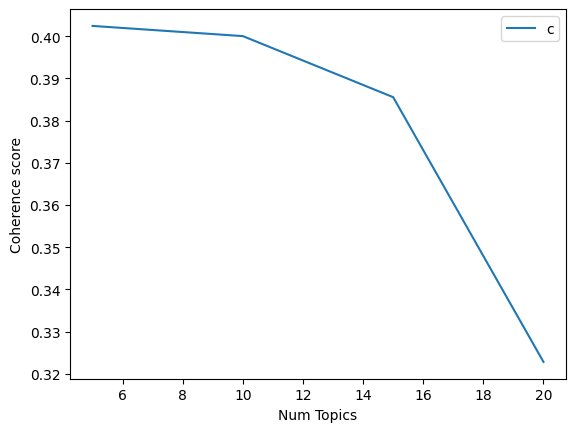

In [224]:
x = range(topic_start, topic_limit, topic_step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [225]:
#find the model with max coherence
max_coherence_index = coherence_values.index(max(coherence_values))
LDA_model = model_list[max_coherence_index]

LDA_model #this is our LDA model object that we will work with

In [231]:
#here we create a list of topic words and their associated weights
LDA_model_topics = LDA_model.print_topics() #LDA_model[corpus]

LDA_model_topics.sort()
print(len(LDA_model_topics))
LDA_model_topics


5


[(0,
  '0.029*"hunter" + 0.021*"biden" + 0.020*"say" + 0.014*"wire" + 0.013*"president" + 0.012*"address" + 0.009*"business" + 0.009*"impeachment" + 0.009*"hearing" + 0.008*"receive"'),
 (1,
  '0.002*"hunter" + 0.002*"say" + 0.002*"biden" + 0.001*"bank" + 0.001*"address" + 0.001*"wire" + 0.001*"family" + 0.001*"hearing" + 0.001*"comer" + 0.001*"impeachment"'),
 (2,
  '0.021*"hunter" + 0.015*"say" + 0.009*"biden" + 0.009*"president" + 0.009*"son" + 0.009*"artwork" + 0.009*"buyer" + 0.009*"purchase" + 0.006*"year" + 0.006*"know"'),
 (3,
  '0.022*"hunter" + 0.019*"document" + 0.018*"biden" + 0.015*"say" + 0.011*"release" + 0.011*"investigation" + 0.010*"include" + 0.009*"committee" + 0.008*"family" + 0.008*"political"'),
 (4,
  '0.020*"say" + 0.014*"plea" + 0.012*"hunter" + 0.012*"son" + 0.012*"federal" + 0.012*"deal" + 0.012*"charge" + 0.012*"agreement" + 0.009*"file" + 0.009*"criminal"')]

In [234]:
topic_dict = topic_level_sentiment(LDA_model)
topic_dict

{'Topic_0': ['hunter',
  'biden',
  'say',
  'wire',
  'president',
  'address',
  'business',
  'impeachment',
  'hearing',
  'receive'],
 'Topic_1': ['hunter',
  'say',
  'biden',
  'bank',
  'address',
  'wire',
  'family',
  'hearing',
  'comer',
  'impeachment'],
 'Topic_2': ['hunter',
  'say',
  'biden',
  'president',
  'son',
  'artwork',
  'buyer',
  'purchase',
  'year',
  'know'],
 'Topic_3': ['hunter',
  'document',
  'biden',
  'say',
  'release',
  'investigation',
  'include',
  'committee',
  'family',
  'political'],
 'Topic_4': ['say',
  'plea',
  'hunter',
  'son',
  'federal',
  'deal',
  'charge',
  'agreement',
  'file',
  'criminal']}

# DATA VISUALIZATION

In [227]:
#making a new dataframe 
df_main_topic = add_main_topic_dataframe(df, LDA_model, corpus)

df_main_topic

#LDA_model.get_document_topics(corpus)
#df['Topics'] = LDA_model.get_document_topics(corpus)
#df.shape

,URL,Sentiment Score,Sentiment Label,Subjectivity Score,Positive Words,Negative Words,Text,Topics,Main Topic,Main Topic Score
0,https://www.foxnews.com/politics/hunter-bidens...,0.04,Neutral,0.24,"more, unpaid, best, new, main, legal, first","down, limited, least, approximately, firm, pre...","exclusive: the $250,000 wire hunter biden rece...","[(0, 0.99782723)]",0,0.997827
1,https://www.foxnews.com/politics/doj-ordered-h...,0.06,Neutral Positive,0.35,"detailed, more, real, normal, exactly, wealthy...","limited, artificially, least, subject, crimina...",the u.s. department of justice ordered fbi and...,"[(3, 0.99828756)]",3,0.998288
2,https://www.foxnews.com/politics/hunter-biden-...,-0.04,Neutral Negative,0.37,"direct, confirmed, extraordinary, generally, p...","complaint, falsely, expected, jail, not, past,...",hunter biden on tuesday filed a lawsuit agains...,"[(0, 0.9978359)]",0,0.997836
3,https://apnews.com/article/hunter-biden-impeac...,0.02,Neutral Negative,0.37,"more, right, promising, far, action, high, muc...","down, expected, unlikely, thin, criminal, long...",washington (ap) — house republicans launched a...,"[(0, 0.9985421)]",0,0.998542
4,https://www.nation.com.pk/21-Jun-2023/hunter-b...,-0.04,Neutral Negative,0.44,"detailed, love, important, not, social, first","least, subject, criminal, guilty, due, other, ...","washigton-hunter biden, the son of president j...","[(4, 0.9952259)]",4,0.995226
5,https://www.nation.com.pk/25-Jul-2021/white-ho...,0.10,Neutral Positive,0.41,"winning, new, ethically, favorite, appropriate...",half,washington - the white house assured saturday ...,"[(2, 0.9949)]",2,0.994900
6,https://www.nation.com.pk/24-Dec-2019/hunter-b...,-0.11,Negative,0.40,"more, nearly, new","limited, subject, criminal, firm, allegedly, s...",hunter biden is the subject of multiple crimin...,"[(3, 0.99431926)]",3,0.994319
7,https://www.cnn.com/2023/09/27/politics/house-...,-0.01,Neutral Negative,0.35,"more, unpaid, real, apparent, significant, not...","complained, addicted, not, criminal, firm, clo...",washington cnn —\ndocuments released wednesday...,"[(3, 0.99840426)]",3,0.998404
8,https://www.bbc.com/news/world-us-canada-55805698,0.00,PARERROR: WebBlockerError,0.00,,,PARERROR: WebBlockerError,"[(0, 0.1000385), (1, 0.10017772), (2, 0.100106...",3,0.599572
9,https://abcnews.go.com/Politics/comer-issue-su...,0.01,Neutral Negative,0.40,"more, far, new, top, directly, first","extreme, other, missing, late, mean, previously",house oversight committee chairman james comer...,"[(0, 0.99675417)]",0,0.996754


# Visualize all articles on their main topic

In [228]:
df_main_topic['Shortened Address'] = df_main_topic['URL'].str.slice(0,35) #shorten the urls to make them easier to read in hover text

df_main_topic = df_main_topic.sort_values('Main Topic') #sort df by main topic so it is in order in the graph.

fig_w_topics = px.scatter(df_main_topic, x="Main Topic", y="Sentiment Score",
                         size="Main Topic Score", custom_data = ['Shortened Address', 'Sentiment Label', 'Main Topic Score'],
                         title="Articles Sorted By Main Topic")#creating a scatter plot with x, y, and color from our df. 
#The custom_data is what we will add to our hover text

fig_w_topics.update_traces(hovertemplate="<br>".join(["Address: %{customdata[0]}",
                                                     "Sentiment Label: %{customdata[1]}",
                                                     "Main Topic Score :%{customdata[2]}"])
                          )#set the hover text to show whatwas in custom_data

fig_w_topics.update_xaxes(type="category")#turn into categorical not continuous data for the x-axis

fig_w_topics.show()

# Generating Cluster Graph of Topics

In [229]:
num_topics = len(LDA_model_topics)

#print(num_topics)

#Get Topic Weights
topic_weights = []
for i in df["Topics"]:
    per_doc_list = [None] * num_topics
    #print(len(per_doc_list))
    for x in i:
        #print(x)
        per_doc_list[x[0]] = x[1]
    topic_weights.append(per_doc_list)

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).to_numpy()

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

#print(arr)

# tSNE Model Creation
tsne_model = TSNE(n_components=2, verbose=1, 
                  random_state=0, angle=.99, 
                  init='pca', perplexity = (arr.shape[0] - 1) / 3)
tsne_lda = tsne_model.fit_transform(arr)

#Color palette for the clusters
mycolors = np.array([color for name, color in mcolors.CSS4_COLORS.items()])


#creating the cluster graph in plotly
fig_cluster = px.scatter(df, x = tsne_lda[:,0],y = tsne_lda[:,1],
                        custom_data = ['Shortened Address', 'Sentiment Label', 'Main Topic'],
                        color = mycolors[topic_num],
                        size = "Main Topic Score",
                        title = "Topic Clustering Graph")

fig_cluster.update_traces(hovertemplate="<br>".join(["Address: %{customdata[0]}",
                                                     "Sentiment Label: %{customdata[1]}",
                                                     "Main Topic:%{customdata[2]}"])
                          )#set the hover text to show whatwas in custom_data



fig_cluster.show()

[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 0.327521
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.651405
[t-SNE] KL divergence after 900 iterations: 0.112412
